In [7]:
cd "C:\Users\gunji\Downloads\cats-dogs"

C:\Users\gunji\Downloads\cats-dogs


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import pandas as pd
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [9]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [10]:
import os
import cv2
# Directory containing the "Train" folder
directory = r"C:\Users\gunji\Downloads\cats-dogs\train"

filepath = []
label = []
corrupted_images = []

folds = os.listdir(directory)

for fold in folds:
    f_path = os.path.join(directory, fold)
    
    imgs = os.listdir(f_path)
    
    for img in imgs:
        
        img_path = os.path.join(f_path, img)
        try:
            # Attempt to read the image
            img_array = cv2.imread(img_path)
            
            # Check if the image array is not empty
            if img_array is not None and not img_array.size == 0:
                filepath.append(img_path)
                label.append(fold)
            else:
                corrupted_images.append(img_path)
                
        except Exception as e:
            # If an error occurs, treat it as a corrupted image
            corrupted_images.append(img_path)
            continue

# Concat data paths with labels
file_path_series = pd.Series(filepath, name='filepath')
Label_path_series = pd.Series(label, name='label')
df_train = pd.concat([file_path_series, Label_path_series], axis=1)

# Remove corrupted images from the data frame
for corrupted_img_path in corrupted_images:
    df_train = df_train[df_train['filepath'] != corrupted_img_path]

print("Number of corrupted images removed:", len(corrupted_images))
print("Remaining images in the dataset:", len(df_train))

Number of corrupted images removed: 0
Remaining images in the dataset: 20000


In [11]:
df_train.head()

filepath label
0  C:\Users\gunji\Downloads\cats-dogs\train\cats\...  cats
1  C:\Users\gunji\Downloads\cats-dogs\train\cats\...  cats
2  C:\Users\gunji\Downloads\cats-dogs\train\cats\...  cats
3  C:\Users\gunji\Downloads\cats-dogs\train\cats\...  cats
4  C:\Users\gunji\Downloads\cats-dogs\train\cats\...  cats

In [12]:
num_images = 12
class_animal = 'Cat'
directory_path = r"C:\Users\gunji\Downloads\cats-dogs\train\cats"
image_filenames = os.listdir(directory_path)

if len(image_filenames) < num_images:
    print(f"Only found images {len(image_filenames)} images in {directory_path}, displaying them all.")
    num_images = len(image_filenames)
    
selected_images = random.sample(image_filenames, num_images)

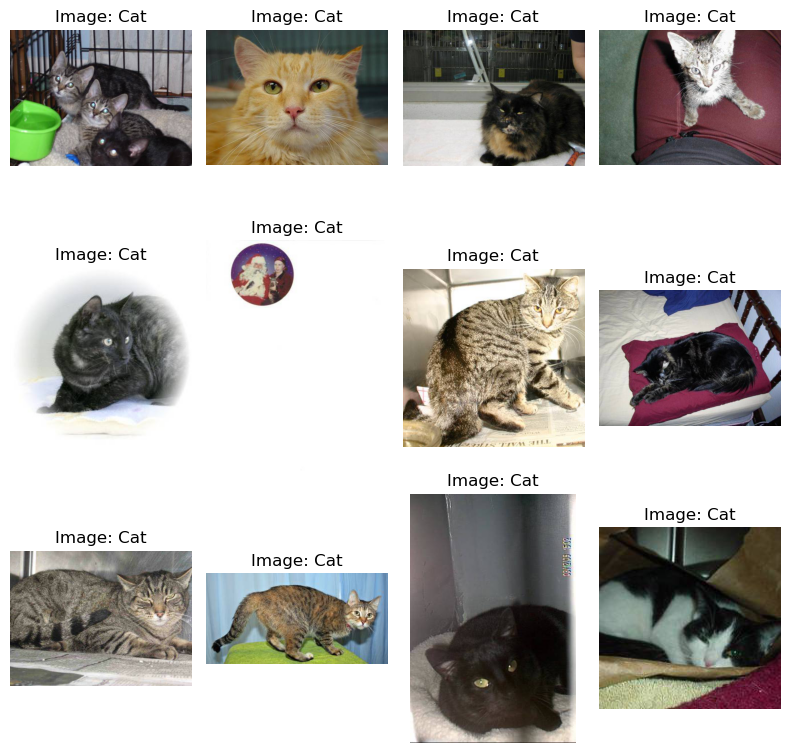

In [13]:
fig, axes = plt.subplots(3,4, figsize=(8, 8))
axes = axes.ravel()

for i, image_file in enumerate(selected_images):
    image_path = os.path.join(directory_path, image_file)
    image = Image.open(image_path)
    axes[i].imshow(image)
    axes[i].set_title(f"Image: {class_animal}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [14]:
num_images = 12
class_animal = 'Dog'
directory_path = r"C:\Users\gunji\Downloads\cats-dogs\train\dogs"
image_filenames = os.listdir(directory_path)

In [15]:
if len(image_filenames) < num_images:
    print(f"Only found images {len(image_filenames)} images in {directory_path}, displaying them all.")
    num_images = len(image_filenames)

In [16]:
selected_images = random.sample(image_filenames, num_images)

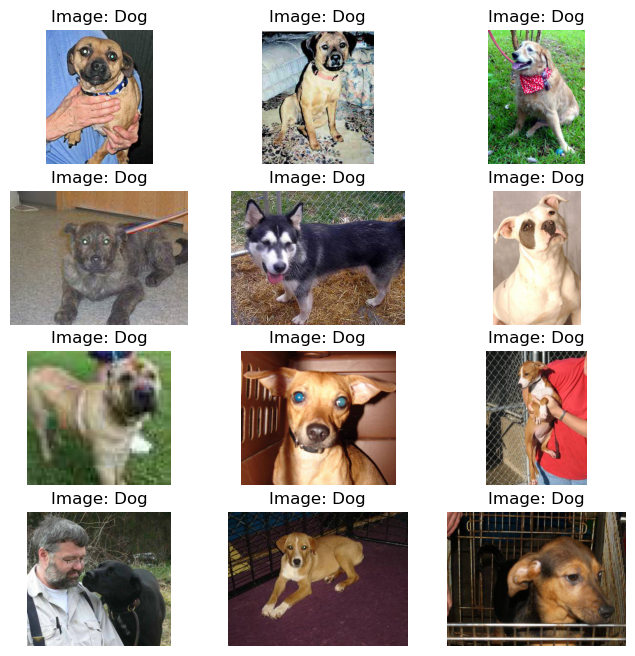

In [17]:
fig, axes = plt.subplots(4, 3, figsize=(8, 8))
axes = axes.ravel()

for i, image_file in enumerate(selected_images):
    image_path = os.path.join(directory_path, image_file)
    image = Image.open(image_path)
    axes[i].imshow(image)
    axes[i].set_title(f"Image: {class_animal}")
    axes[i].axis('off')


In [18]:
def plot_images_from_directory(directory_path, class_animal, num_images=9):
    # Retrieve list of all file names in the directory
    image_filenames = os.listdir(directory_path)

    # If there are fewer images than requested, we'll just show them all
    if len(image_filenames) < num_images:
        print(f"Only found {len(image_filenames)} images in {directory_path}, displaying them all.")
        num_images = len(image_filenames)

    # Randomly select 'num_images' number of file names
    selected_images = random.sample(image_filenames, num_images)

    # Plotting the images
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))  # Adjust the size as needed
    axes = axes.ravel()

    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(directory_path, image_file)
        image = Image.open(image_path)
        axes[i].imshow(image)
        axes[i].set_title(f"Image: {class_animal}")
        axes[i].axis('off')  # Hide the axis

    plt.tight_layout()
    plt.show()

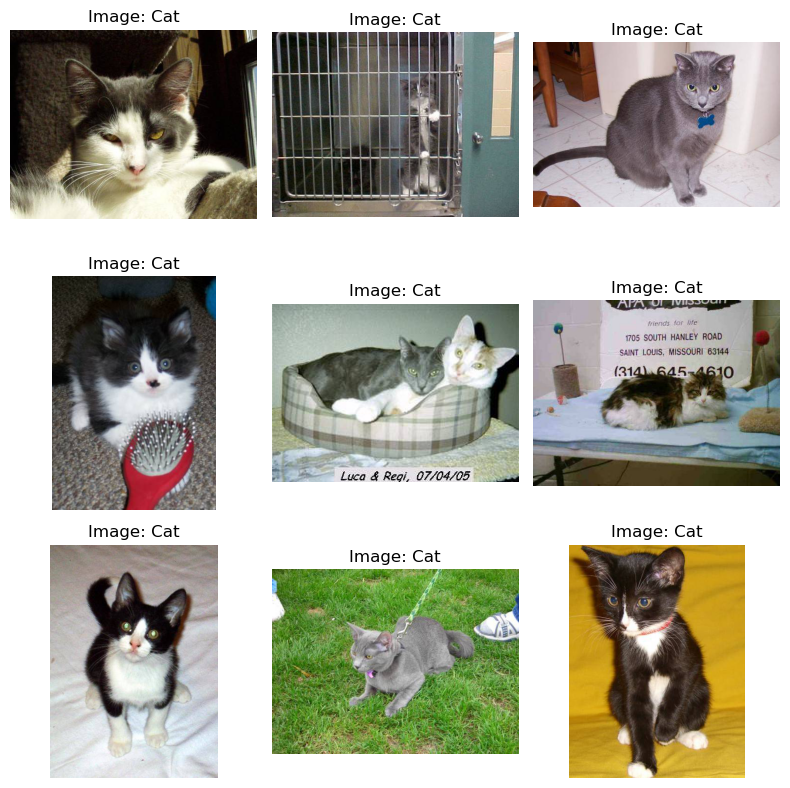

In [19]:
cat_directory_path =r"C:\Users\gunji\Downloads\cats-dogs\train\cats"
plot_images_from_directory(cat_directory_path, class_animal = 'Cat')

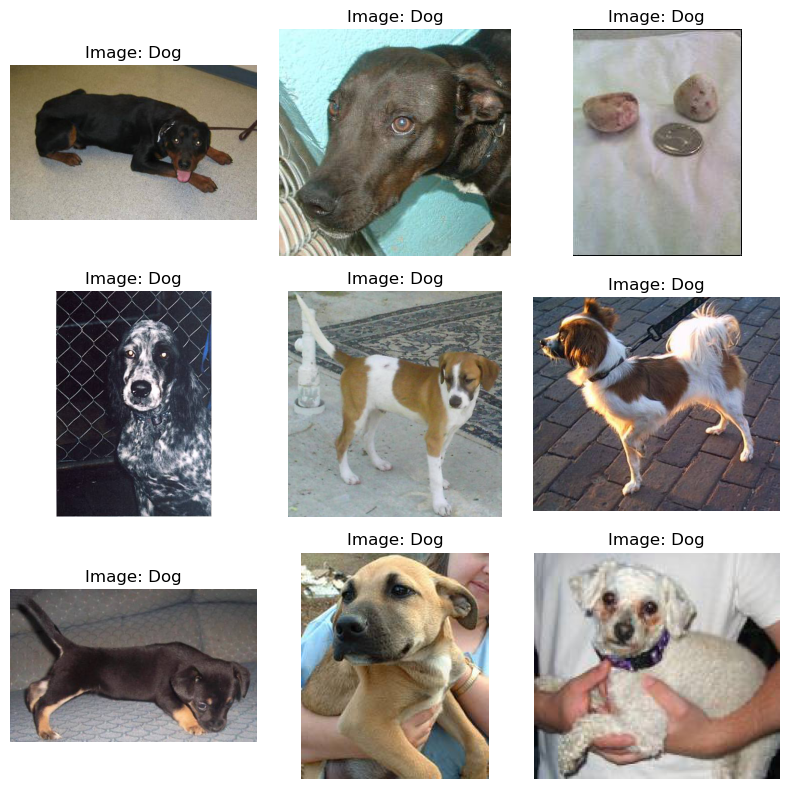

In [20]:
dog_directory_path =r"C:\Users\gunji\Downloads\cats-dogs\train\dogs"
plot_images_from_directory(dog_directory_path, class_animal = 'Dog')

In [21]:
cat_images = os.listdir(cat_directory_path)
dog_images = os.listdir(dog_directory_path)

classes_animals = ['Cats', 'Dogs']
count = [len(cat_images), len(dog_images)]

print(count)

[10000, 10000]


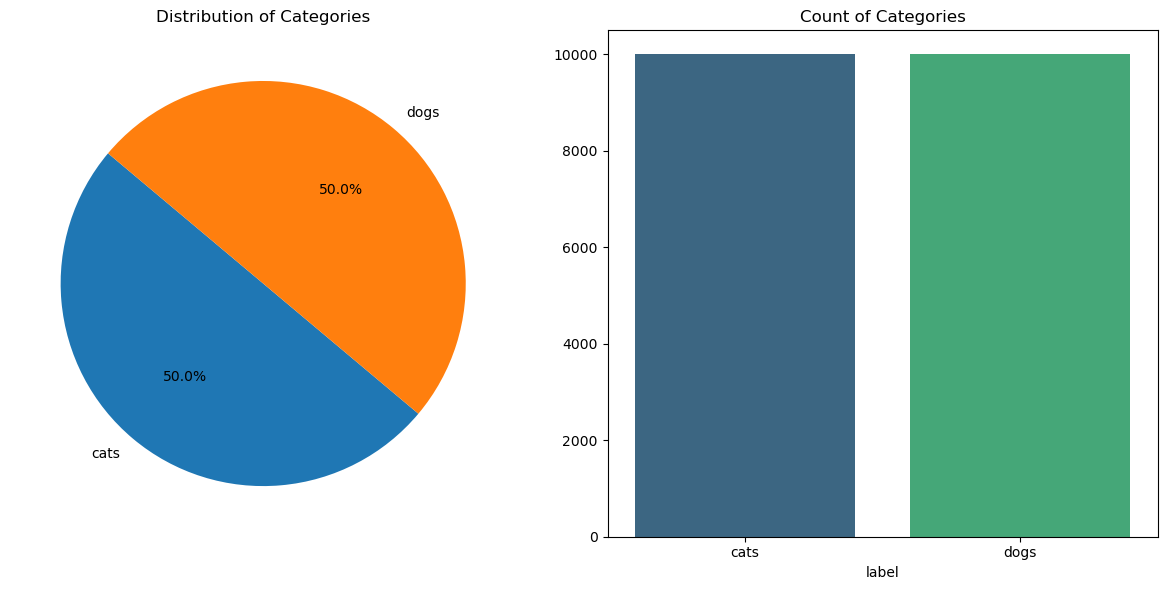

In [22]:
# Count the occurrences of each category in the 'category' column
count = df_train['label'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Plot pie chart on the first subplot
palette = sns.color_palette("viridis")
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], palette="viridis")
axs[1].set_title('Count of Categories')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

# Split data into train, validation, and test sets
train_df, test_val_df = train_test_split(df_train, test_size=0.3, random_state=42)
test_df, val_df = train_test_split(test_val_df, test_size=0.5, random_state=42)

# Data generator for training
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="filepath",
    y_col="label",
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

# Data generator for validation
validation_generator = train_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="filepath",
    y_col="label",
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

# Data generator for test
test_generator = train_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="filepath",
    y_col="label",
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

Found 14000 validated image filenames belonging to 2 classes.
Found 3000 validated image filenames belonging to 2 classes.
Found 3000 validated image filenames belonging to 2 classes.


In [24]:
train_class_labels = train_generator.class_indices
print("training class labels: ", train_class_labels)

validation_class_labels = validation_generator.class_indices
print('validation class labels: ', validation_class_labels)

training class labels:  {'cats': 0, 'dogs': 1}
validation class labels:  {'cats': 0, 'dogs': 1}


In [25]:
def plot_images_from_generator(generator, num_images=4):
    images, labels = next(generator)
    fig, axes = plt.subplots(1, num_images, figsize=(20, 20))
    axes = axes.flatten()

    for img, label, ax in zip(images, labels, axes):
        ax.imshow(img)
        class_labels = dict((v,k) for k,v in generator.class_indices.items())
        ax.set_title(class_labels[int(label)])
        ax.axis(False)

    plt.tight_layout()
    plt.show()

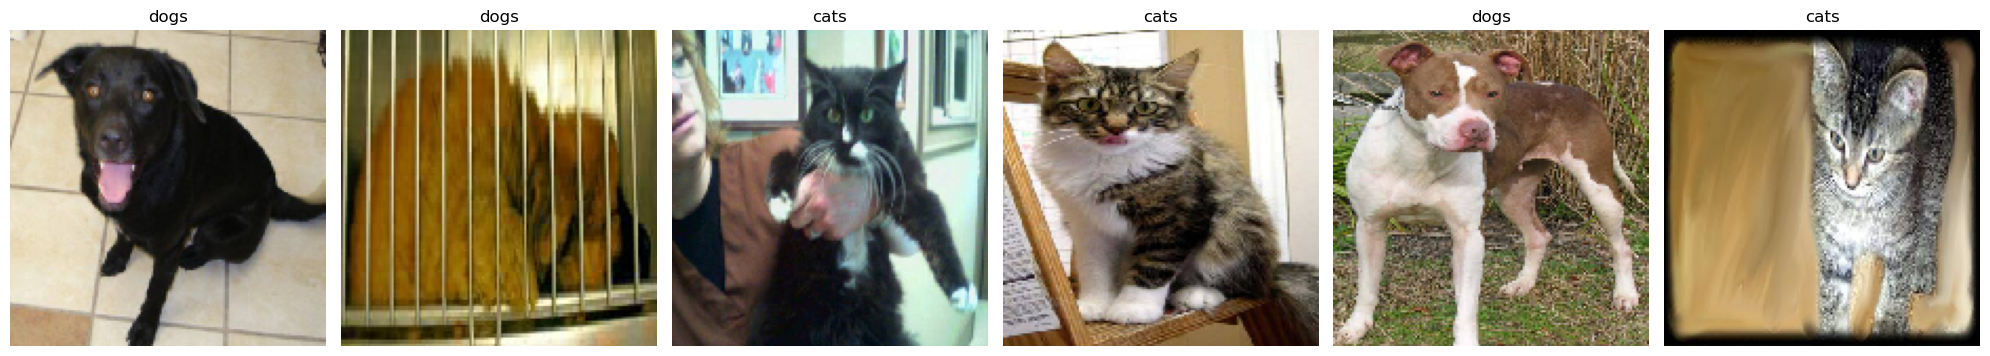

In [26]:
plot_images_from_generator(train_generator, num_images=6)

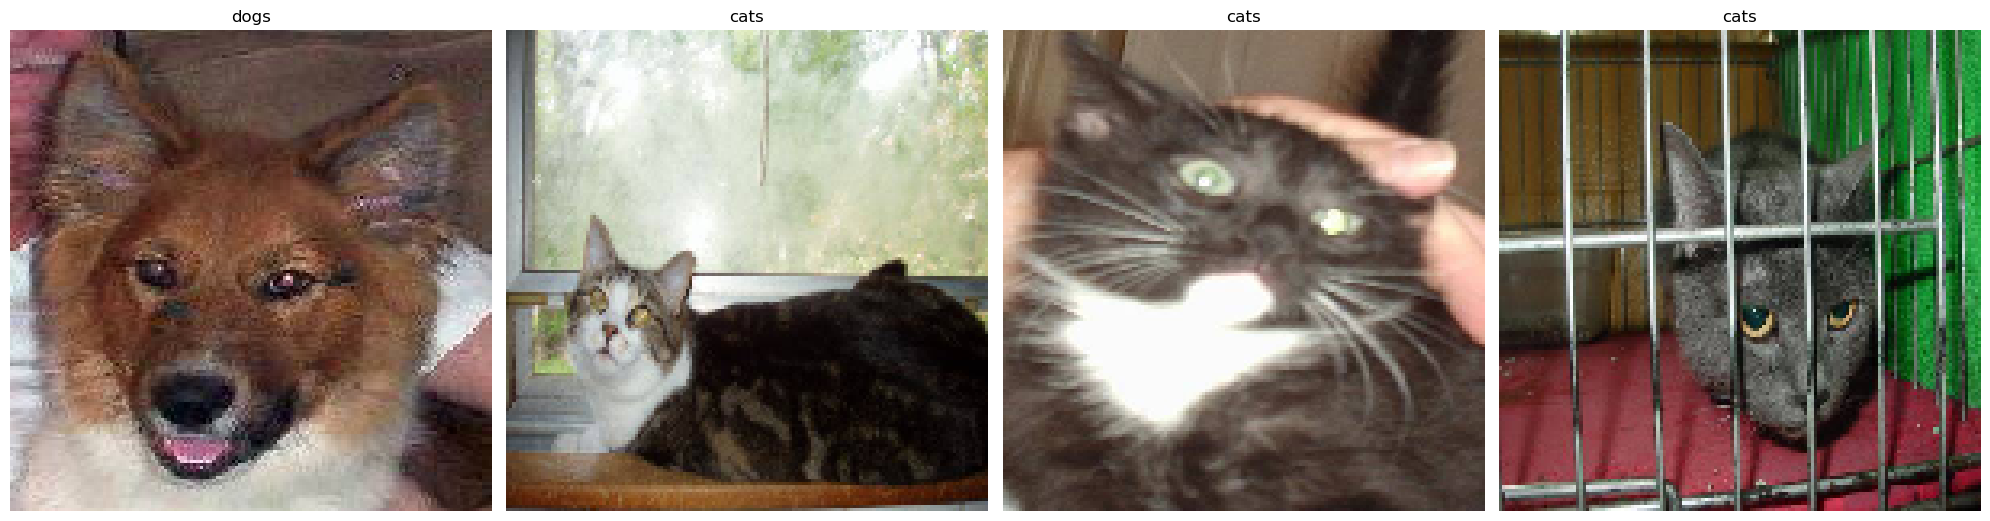

In [27]:
import matplotlib.pyplot as plt

# Function to plot images and their labels
def plot_images_from_generator(generator, num_images=4):
    # Get a batch of images and labels from the generator
    images, labels = next(generator)

    # Set up the plot
    fig, axes = plt.subplots(1, num_images, figsize=(20,20))
    axes = axes.flatten()

    for img, label, ax in zip(images, labels, axes):
        # Image preprocessing might differ, adjust accordingly
        ax.imshow(img)
        # Set the title to the class label
        # Inverse the class indices dictionary to get class names from labels
        class_labels = dict((v,k) for k,v in generator.class_indices.items())
        ax.set_title(class_labels[int(label)])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Now, call this function with your training generator
plot_images_from_generator(train_generator, num_images=4)

In [28]:
train_generator.reset()
train_generator.reset()

In [29]:
model = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,811,969 (25.99 MB)

 Trainable params: 6,811,969 (25.99 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
batch = 20
train_steps = np.ceil(train_generator.samples / batch)
validation_steps_per_epoch = np.ceil(validation_generator.samples / batch)
print(train_steps, validation_steps_per_epoch)

700.0 150.0


In [34]:
history = model.fit(train_generator,
                    steps_per_epoch=800,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=200,
                   verbose=1)

Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 315s 390ms/step - accuracy: 0.5618 - loss: 0.6902 - val_accuracy: 0.6797 - val_loss: 0.5973
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 323s 403ms/step - accuracy: 0.7048 - loss: 0.5730 - val_accuracy: 0.7700 - val_loss: 0.4920
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 384s 480ms/step - accuracy: 0.7812 - loss: 0.4603 - val_accuracy: 0.8153 - val_loss: 0.4098
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1818s 2s/step - accuracy: 0.8371 - loss: 0.3690 - val_accuracy: 0.8290 - val_loss: 0.3835
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 253s 316ms/step - accuracy: 0.8780 - loss: 0.2960 - val_accuracy: 0.8367 - val_loss: 0.3652
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 335s 419ms/step - accuracy: 0.9144 - loss: 0.2097 - val_accuracy: 0.8430 - val_loss: 0.3748
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 301s 375ms/step - accuracy: 0.9437 - loss: 0.1515 - val_accuracy: 0.8570 - val_loss: 0.4096
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 284s 354ms/step - accuracy: 0.9634 - l

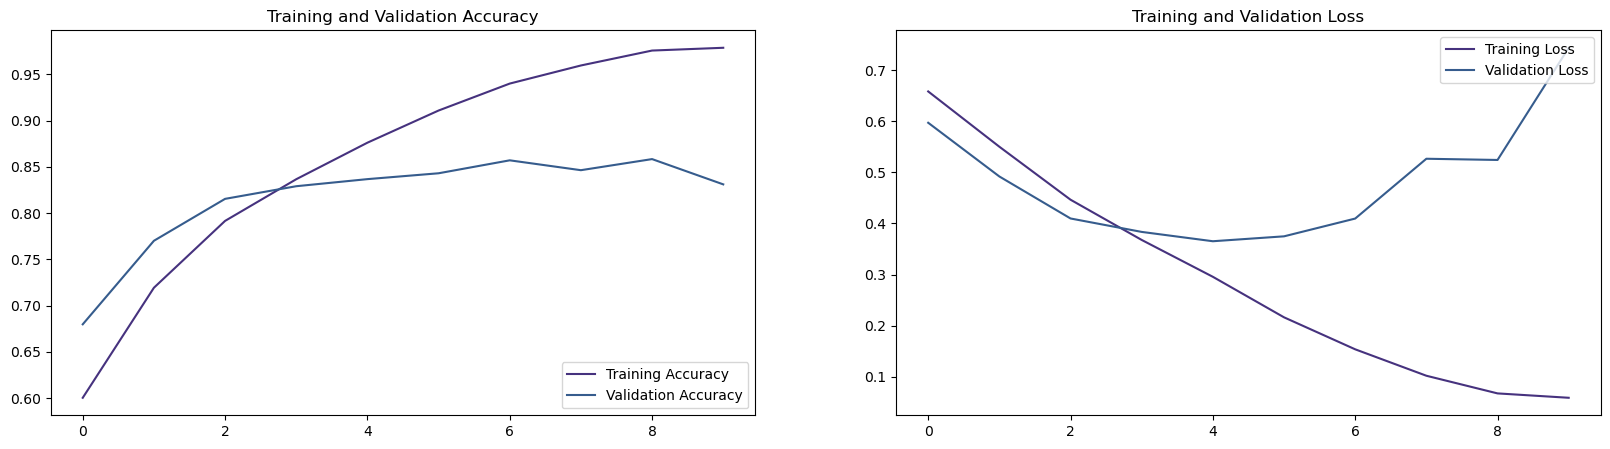

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy*100:.2f}%")
print(f"Test loss: {loss:.2f}")

150/150 ━━━━━━━━━━━━━━━━━━━━ 45s 298ms/step - accuracy: 0.8255 - loss: 0.7796
Test accuracy: 83.60%
Test loss: 0.72
